In [3]:
import pandas as pd

annoy_df = pd.read_csv('../results/index-size/sift-ann.csv')
hnsw_df = pd.read_csv('../results/index-size/sift-hnsw.csv')

size = 512000.128

annoy_df['size']  = annoy_df['size'] - size
hnsw_df['size'] = hnsw_df['size'] - size

annoy_df['method'] = "annoy"
hnsw_df['method'] = "hnsw"


In [6]:
annoy_df.tail()

,recall,size,tree_nums,method
10,0.90692,1.266055e+06,110,annoy
11,0.91445,1.380598e+06,120,annoy
12,0.91885,1.495374e+06,130,annoy
13,0.92741,1.610178e+06,140,annoy
14,0.92984,1.725026e+06,150,annoy


In [7]:
hnsw_df.tail()

,recall,size,M,method
10,0.89601,7.536410e+05,96,hnsw
11,0.90067,8.161530e+05,104,hnsw
12,0.90642,8.786419e+05,112,hnsw
13,0.90684,9.411437e+05,120,hnsw
14,0.90784,1.003643e+06,128,hnsw


In [5]:
cols = ['method', 'size', 'recall']

df = pd.concat([annoy_df[cols].tail(11), hnsw_df[cols].tail(10)])
df.tail(10)

,method,size,recall
5,hnsw,4.411924e+05,0.86227
6,hnsw,5.036858e+05,0.87736
7,hnsw,5.661819e+05,0.88719
8,hnsw,6.286682e+05,0.89771
9,hnsw,6.911503e+05,0.89424
10,hnsw,7.536410e+05,0.89601
11,hnsw,8.161530e+05,0.90067
12,hnsw,8.786419e+05,0.90642
13,hnsw,9.411437e+05,0.90684
14,hnsw,1.003643e+06,0.90784


<Axes: xlabel='recall', ylabel='size'>

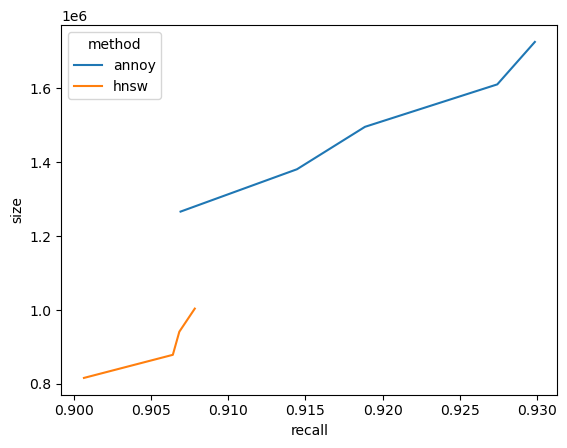

In [14]:
import seaborn as sns

sns.lineplot(data=df.query('recall > 0.90'), x="recall", y="size", hue="method")

In [12]:
annoy_df.iloc[10]

recall             0.90692
size         1266055.34075
tree_nums              110
method               annoy
Name: 10, dtype: object

<Axes: xlabel='method', ylabel='size'>

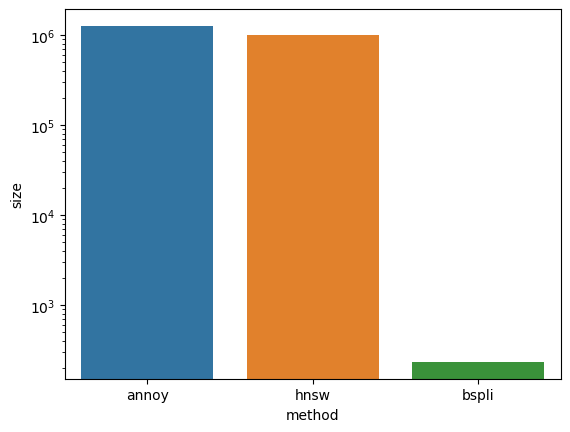

In [16]:
size_df = pd.DataFrame(data={
    'method': ['annoy', 'hnsw', 'bspli'],
    'size': [1266055.34075, 1003642.830984, 233.128 ]
})

sns.barplot(data=size_df, x="method", y="size", log=True)